# Import Necessary Library

In [22]:
import numpy as np
import pandas as pd
import itertools
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
news=pd.read_csv('news.csv')

In [3]:
news.head(62)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Get shape of the dataset
news.shape

(6335, 4)

In [6]:
#Get first five rows of the dataset
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
#Checking for null values or missing values
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
news.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

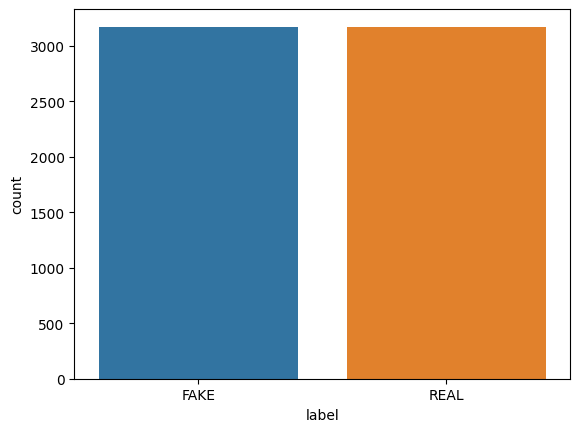

In [11]:

import seaborn as sns
sns.countplot(x='label', data = news)

In [30]:
# import required libaries for preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('punkt')

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
#Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()
    
    # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)
    
    # remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # fetch only alphanumeric values and apply stemming on that word
    #NORMALISE
    
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [32]:
news['text'].apply(text_preprocessing)

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       secretari state john kerri said monday stop pa...
3       kayde king kaydeek novemb 9 2016 lesson tonigh...
4       primari day new york hillari clinton donald tr...
                              ...                        
6330    state depart told republican nation committe c...
6331    p pb stand plutocrat pentagon post oct 27 2016...
6332    protest tool oligarchi alway provok rage part ...
6333    addi ababa ethiopia obama conven meet leader s...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: text, Length: 6335, dtype: object

# Splitting the data into training and testing

In [13]:
X_train,X_test,y_train,y_test=train_test_split(news['text'], news.label, test_size=0.2, random_state=7)

In [14]:
X_train

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object

In [15]:
X_train.shape

(5068,)

In [16]:
y_train

6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object

# Initialize a TfidVectorizer

In [33]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [34]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

# Intialize a PassiveAggressiveClassifier

In [35]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [36]:
#Predict on the testing data
y_pred=pac.predict(tfidf_test)

In [37]:
#Finding Accuracy
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.5%


In [38]:
print('\n clasification report:\n',classification_report(y_test,y_pred))



 clasification report:
               precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.92       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [24]:
ii=['This is a really important question, Lambert says. “I don’t want to be passed along to two or three people,” she says. “I want one person to contact.” There may be specific contact points for different areas, she adds, such as the director of nursing for related questions. However, “I want to know that I can pop into the executive director’s office anytime, ask any question and make any kind of complaint,” she emphasizes. “I want to know that person is available. Because sometimes, you have to go up to that level.""']

In [41]:
nn=['Nvidia’s cloud gaming service, GeForce Now, will offer first-party Microsoft titles to over 20 million players for the coming decade. And that includes Call of Duty if regulators approve Microsoft’s acquisition of Activision Blizzard. Notably, Nvidia initially opposed the merger, but GeForce Now Vice President Phil Eisler says the 10-year agreement changed their tune.""']


In [25]:
ii=tfidf_vectorizer.transform(ii)


In [26]:
y_pred=pac.predict(ii)

In [27]:
y_pred

array(['REAL'], dtype='<U4')

In [42]:
nn=tfidf_vectorizer.transform(nn)


In [43]:
y_pred=pac.predict(nn)

In [44]:
y_pred

array(['FAKE'], dtype='<U4')